In [52]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
# get data
filename = 'police_killings.csv'
df = pd.read_csv(filename, encoding= 'unicode_escape')
df = df.fillna(0)
df = df.drop(['URL of image of victim','Link to news article or photo of official document'], axis=1)
df['Zipcode'] = df['Zipcode'].astype(int)
df['Zipcode'] = df['Zipcode'].astype(str)
df["Victim's age"] = df["Victim's age"].str.replace('Unknown', '0', regex=False)
df["Victim's age"] = df["Victim's age"].str.replace('40s', '0', regex=False)
df["Victim's race"] = df["Victim's race"].str.replace('Unknown Race', 'Unknown race', regex=False)
df["Victim's age"] = df["Victim's age"].fillna('0')
df["Victim's age"] = df["Victim's age"].astype(int)

df['Geography']=df["Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx )"]
df = df.drop(["Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx )"],axis=1)
df["Date of Incident (month/day/year)"]=pd.to_datetime(df["Date of Incident (month/day/year)"])
df['Year'] = df["Date of Incident (month/day/year)"].dt.year
df['Month'] = df["Date of Incident (month/day/year)"].dt.month

In [53]:
df.head()

,Victim's name,Victim's age,Victim's gender,Victim's race,Date of Incident (month/day/year),Street Address of Incident,City,State,Zipcode,County,...,Unarmed,Alleged Weapon (Source: WaPo),Alleged Threat Level (Source: WaPo),Fleeing (Source: WaPo),Body Camera (Source: WaPo),WaPo ID (If included in WaPo database),Off-Duty Killing?,Geography,Year,Month
0,Tyree Bell,31,Male,Black,2013-01-01,3727 N. 42nd St.,Omaha,NE,68111,Douglas,...,Allegedly Armed,0,0,0,0,0.0,0,Urban,2013,1
1,Abel Gurrola,26,Male,Hispanic,2013-01-01,720 Terrace Way,Bakersfield,CA,93304,Kern,...,Allegedly Armed,0,0,0,0,0.0,0,Urban,2013,1
2,Christopher Tavares,21,Male,Hispanic,2013-01-01,Highway 50 and North Elizabeth Street,Pueblo,CO,81008,Pueblo,...,Allegedly Armed,0,0,0,0,0.0,0,Suburban,2013,1
3,Mark Chavez,49,Male,Hispanic,2013-01-01,912 Loma Linda Ave.,Farmington,NM,87401,San Juan,...,Allegedly Armed,0,0,0,0,0.0,0,Urban,2013,1
4,Andrew L. Closson,21,Male,White,2013-01-01,U.S. Highway 53,Gordon,WI,54838,Douglas,...,Allegedly Armed,0,0,0,0,0.0,0,Rural,2013,1


In [54]:
df.columns

Index(['Victim's name', 'Victim's age', 'Victim's gender', 'Victim's race',
       'Date of Incident (month/day/year)', 'Street Address of Incident',
       'City', 'State', 'Zipcode', 'County', 'Agency responsible for death',
       'Cause of death',
       'A brief description of the circumstances surrounding the death',
       'Official disposition of death (justified or other)',
       'Criminal Charges?', 'Symptoms of mental illness?', 'Unarmed',
       'Alleged Weapon (Source: WaPo)', 'Alleged Threat Level (Source: WaPo)',
       'Fleeing (Source: WaPo)', 'Body Camera (Source: WaPo)',
       'WaPo ID (If included in WaPo database)', 'Off-Duty Killing?',
       'Geography', 'Year', 'Month'],
      dtype='object')

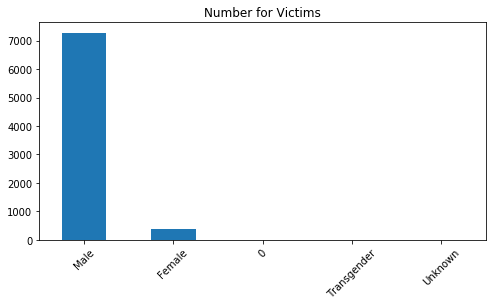

In [90]:
ax = df["Victim's gender"].value_counts().plot(kind='bar',rot = 45,
                                    figsize=(8,4),
                                    title="Number for Victims")

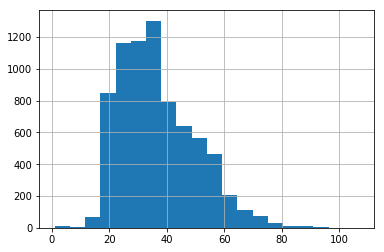

In [89]:
df_age = df[df["Victim's age"]>0]
df_age["Victim's age"].hist(bins=20)

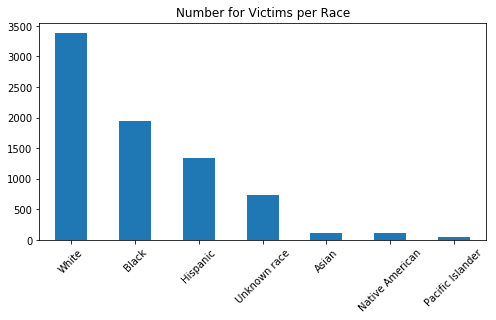

In [58]:
ax = df["Victim's race"].value_counts().plot(kind='bar',rot = 45,
                                    figsize=(8,4),
                                    title="Number for Victims per Race")

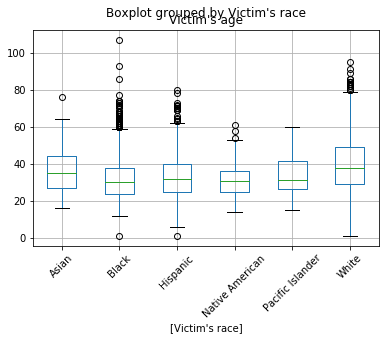

In [59]:
df_age_race = df_age[df_age["Victim's race"]!="Unknown Race"]
df_age_race = df_age_race[df_age_race["Victim's race"]!="Unknown race"]
boxplot = df_age_race.boxplot(column=["Victim's age"], by=["Victim's race"],rot=45)

In [70]:
## State
df_groupby = df.groupby(['State']).agg({"Victim's name":'count'}).reset_index()
df_groupby.columns = ['State','Number of Victims']
df_groupby['Ratio to Total'] = df_groupby['Number of Victims']/len(df)
df_groupby.sort_values(by="Number of Victims",ascending=False).head(5)

,State,Number of Victims,Ratio to Total
4,CA,1189,0.154798
43,TX,721,0.093868
9,FL,540,0.070303
3,AZ,343,0.044656
10,GA,266,0.034631


In [62]:
## Race
df_race_groupby = df.groupby(["Victim's race"]).agg({"Victim's name":'count'}).reset_index()
df_race_groupby.columns = ['Race','Number of Victims']
df_race_groupby.sort_values(by="Number of Victims",ascending=False)

,Race,Number of Victims
6,White,3385
1,Black,1949
2,Hispanic,1339
5,Unknown race,736
0,Asian,118
3,Native American,112
4,Pacific Islander,42


In [91]:
## City
df_city_groupby = df.groupby(['City']).agg({"Victim's name":'count'}).reset_index()
df_city_groupby.columns = ['City','Number of Victims']
df_city_groupby.sort_values(by="Number of Victims",ascending=False).head(10)

,City,Number of Victims
1474,Los Angeles,115
1999,Phoenix,111
1175,Houston,101
439,Chicago,79
2257,San Antonio,57
1388,Las Vegas,56
594,Dallas,54
26,Albuquerque,51
519,Columbus,50
1847,Oklahoma City,49


## California case

In [33]:
df_CA = df[df['State'] == 'CA']
df_CA_groupby = df_CA.groupby(['City']).agg({"Victim's name":"count"}).reset_index()
df_CA_groupby.columns = ["City","Number of victims"]
df_CA_groupby.sort_values(by="Number of victims",ascending=False).head()

,City,Number of victims
182,Los Angeles,115
21,Bakersfield,33
282,San Diego,32
118,Fresno,29
181,Long Beach,26


In [71]:
df_CA_race_groupby = df_CA.groupby(["Victim's race"]).agg({"Victim's name":"count"}).reset_index()
df_CA_race_groupby.columns = ['Race','Number of victims']
df_CA_race_groupby['Ratio to Total'] = df_CA_race_groupby['Number of victims']/len(df_CA)
df_CA_race_groupby.sort_values(by="Number of victims",ascending=False)

,Race,Number of victims,Ratio to Total
2,Hispanic,490,0.412111
7,White,334,0.280908
1,Black,186,0.156434
6,Unknown race,104,0.087468
0,Asian,44,0.037006
5,Unknown Race,15,0.012616
4,Pacific Islander,9,0.007569
3,Native American,7,0.005887


In [88]:
## Los Angeles
df_Los = df[df['City'] == 'Los Angeles']
df_Los_race_groupby = df_Los.groupby(["Victim's race"]).agg({"Victim's name":"count"}).reset_index()
df_Los_race_groupby.columns = ['Race','Number of victims']
df_Los_race_groupby['Ratio to Total'] = df_Los_race_groupby['Number of victims']/len(df_Los)
df_Los_race_groupby.sort_values(by="Number of victims",ascending=False)

,Race,Number of victims,Ratio to Total
2,Hispanic,63,0.547826
1,Black,31,0.269565
4,White,17,0.147826
3,Unknown race,3,0.026087
0,Asian,1,0.008696


### Based on the numbers, hispanic victims in CA is about 36.594% (490/1339) of all hispanic victims across the nation

## Texas Case

In [66]:
df_TX = df[df['State'] == 'TX']
df_TX_groupby = df_TX.groupby(['City']).agg({"Victim's name":"count"}).reset_index()
df_TX_groupby.columns = ["City","Number of victims"]
df_TX_groupby.sort_values(by="Number of victims",ascending=False).head(10)

,City,Number of victims
114,Houston,100
195,San Antonio,57
62,Dallas,51
86,Fort Worth,32
14,Austin,31
76,El Paso,17
138,Laredo,14
12,Arlington,13
9,Amarillo,10
156,Midland,9


In [67]:
df_TX_race_groupby = df_TX.groupby(["Victim's race"]).agg({"Victim's name":"count"}).reset_index()
df_TX_race_groupby.columns = ['Race','Number of victims']
df_TX_race_groupby.sort_values(by="Number of victims",ascending=False)

,Race,Number of victims
5,White,258
2,Hispanic,221
1,Black,157
4,Unknown race,74
0,Asian,10
3,Native American,1


## Cities with the highest White victims

In [49]:
df_white = df[df["Victim's race"] == "White"]
df_white_groupby = df_white.groupby(['City']).agg({"Victim's name":"count"}).reset_index()
df_white_groupby.columns = ['City',"Number of victims"]
df_white_groupby.sort_values(by="Number of victims", ascending = False).head(10)

,City,Number of victims
1377,Phoenix,38
947,Las Vegas,24
414,Dallas,21
837,Jacksonville,21
81,Austin,20
863,Kansas City,18
1005,Los Angeles,17
19,Albuquerque,17
1761,Tulsa,17
1651,Springfield,16


In [74]:
## Off-Duty Killing
df_white_off_groupby = df_white.groupby(['Off-Duty Killing?']).agg({"Victim's name":"count"}).reset_index()
df_white_off_groupby.columns = ['Off-Duty Killing',"Number of victims"]
df_white_off_groupby['Ratio to Total'] = df_white_off_groupby['Number of victims']/len(df_white)
df_white_off_groupby.sort_values(by="Number of victims", ascending = False).head(5)

,Off-Duty Killing,Number of victims,Ratio to Total
0,0,3306,0.976662
1,Off-Duty,79,0.023338


In [76]:
## Geography
df_white_geo_groupby = df_white.groupby(['Geography']).agg({"Victim's name":"count"}).reset_index()
df_white_geo_groupby.columns = ['Geography',"Number of victims"]
df_white_geo_groupby['Ratio to Total'] = df_white_geo_groupby['Number of victims']/len(df_white)
df_white_geo_groupby.sort_values(by="Number of victims", ascending = False).head(5)

,Geography,Number of victims,Ratio to Total
2,Suburban,1727,0.510192
1,Rural,1086,0.320827
3,Urban,543,0.160414
0,0,29,0.008567


## Cities with highest Black Victims

In [79]:
df_black = df[df["Victim's race"] == "Black"]
df_black_groupby = df_black.groupby(['City']).agg({"Victim's name":"count"}).reset_index()
df_black_groupby.columns = ['City',"Number of victims"]
df_black_groupby.sort_values(by="Number of victims", ascending = False).head(10)

,City,Number of victims
134,Chicago,60
339,Houston,44
677,St. Louis,39
421,Los Angeles,31
159,Columbus,30
48,Baltimore,29
756,Washington,26
525,Oklahoma City,26
564,Philadelphia,22
357,Jacksonville,21


In [83]:
df_black_off_groupby = df_black.groupby(['Off-Duty Killing?']).agg({"Victim's name":"count"}).reset_index()
df_black_off_groupby.columns = ['Off-Duty Killing',"Number of victims"]
df_black_off_groupby['Ratio to Total'] = df_black_off_groupby['Number of victims']/len(df_black)
df_black_off_groupby.sort_values(by="Number of victims", ascending = False).head(5)

,Off-Duty Killing,Number of victims,Ratio to Total
0,0,1853,0.950744
1,Off-Duty,96,0.049256


In [84]:
df_black_geo_groupby = df_black.groupby(['Geography']).agg({"Victim's name":"count"}).reset_index()
df_black_geo_groupby.columns = ['Geography',"Number of victims"]
df_black_geo_groupby['Ratio to Total'] = df_black_geo_groupby['Number of victims']/len(df_black)
df_black_geo_groupby.sort_values(by="Number of victims", ascending = False).head(5)

,Geography,Number of victims,Ratio to Total
2,Suburban,888,0.455618
3,Urban,848,0.435095
1,Rural,196,0.100564
0,0,17,0.008722


## Cities with Hispanic

In [48]:
df_his = df[df["Victim's race"] == "Hispanic"]
df_his_groupby = df_his.groupby(['City']).agg({"Victim's name":"count"}).reset_index()
df_his_groupby.columns = ['City',"Number of victims"]
df_his_groupby.sort_values(by="Number of victims", ascending = False).head(10)

,City,Number of victims
311,Los Angeles,63
408,Phoenix,40
249,Houston,29
462,San Antonio,29
6,Albuquerque,29
552,Tucson,20
336,Miami,18
191,Fresno,17
30,Bakersfield,17
128,Denver,16


In [75]:
df_his_off_groupby = df_his.groupby(['Off-Duty Killing?']).agg({"Victim's name":"count"}).reset_index()
df_his_off_groupby.columns = ['Off-Duty Killing',"Number of victims"]
df_his_off_groupby['Ratio to Total'] = df_his_off_groupby['Number of victims']/len(df_his)
df_his_off_groupby.sort_values(by="Number of victims", ascending = False)

,Off-Duty Killing,Number of victims,Ratio to Total
0,0,1314,0.981329
1,Off-Duty,25,0.018671


In [92]:
df_his_geo_groupby = df_his.groupby(['Geography']).agg({"Victim's name":"count"}).reset_index()
df_his_geo_groupby.columns = ['Geography',"Number of victims"]
df_his_geo_groupby['Ratio to Total'] = df_his_geo_groupby['Number of victims']/len(df_his)
df_his_geo_groupby.sort_values(by="Number of victims", ascending = False).head(5)

,Geography,Number of victims,Ratio to Total
2,Suburban,705,0.526512
3,Urban,470,0.351008
1,Rural,158,0.117999
0,0,6,0.004481
